In [1]:
%matplotlib inline
import networkx  as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netwulf as nw

In [25]:
G4 = nx.read_gpickle( '../../Files/Identifying_Subs/G4.pickle')

In [3]:
posts = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/EDA_stats.csv')
# posts.rename(columns={'Unnamed: 0':'subreddit', 'posts_pro':'anti', 'posts_neutral': "pro", 'posts_anti':'neutral'}, inplace=True)

In [4]:
posts.rename(columns={'Unnamed: 0':'subreddit'}, inplace=True)

In [5]:
posts.head()

subreddit  posts  Non-Covid  Covid  authors
0           altnewz   3651       2760    891      169
1      CovidIsACult    115         60     55        6
2       didnthappen    204        191     13       49
3    OpenTheSchools     39         23     16       12
4  punnychalkboards    258        252      6       31

# Classifier I

In [6]:
posts['p_cd_ratio'] = posts['Covid'] / posts['posts']
posts['p_nc_ratio'] = posts['Non-Covid'] / posts['posts']

<AxesSubplot:ylabel='Frequency'>

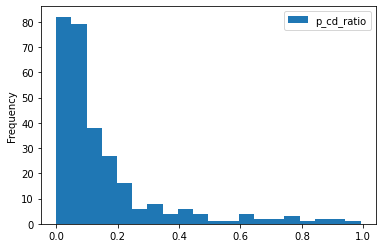

In [7]:
posts[['p_cd_ratio']].plot( kind='hist', bins = 20, legend=True )

(array([82., 79., 38., 27., 16.,  6.,  8.,  4.,  6.,  4.,  1.,  1.,  4.,
         2.,  2.,  3.,  1.,  2.,  2.,  1.]),
 array([0.        , 0.04954233, 0.09908467, 0.148627  , 0.19816934,
        0.24771167, 0.297254  , 0.34679634, 0.39633867, 0.44588101,
        0.49542334, 0.54496568, 0.59450801, 0.64405034, 0.69359268,
        0.74313501, 0.79267735, 0.84221968, 0.89176201, 0.94130435,
        0.99084668]),
 <BarContainer object of 20 artists>)

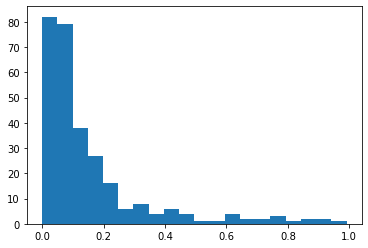

In [8]:
plt.hist(posts['p_cd_ratio'], bins = 20)

In [9]:
posts.head()

subreddit  posts  Non-Covid  Covid  authors  p_cd_ratio  p_nc_ratio
0           altnewz   3651       2760    891      169    0.244043    0.755957
1      CovidIsACult    115         60     55        6    0.478261    0.521739
2       didnthappen    204        191     13       49    0.063725    0.936275
3    OpenTheSchools     39         23     16       12    0.410256    0.589744
4  punnychalkboards    258        252      6       31    0.023256    0.976744

In [10]:
cd_r_dict = pd.Series(posts['p_cd_ratio'].values, index=posts.subreddit).to_dict()

In [28]:
nx.set_node_attributes(G4, cd_r_dict, 'cov_rel',)

In [41]:
# remove node if it does not have the attribute 'cov_rel'
G4.remove_nodes_from([n for n in G4.nodes() if 'cov_rel' not in G4.nodes[n]])

Text(0.5, 1.0, 'Network of Subreddits with Color Coded by Percentage of Covid-related Posts')

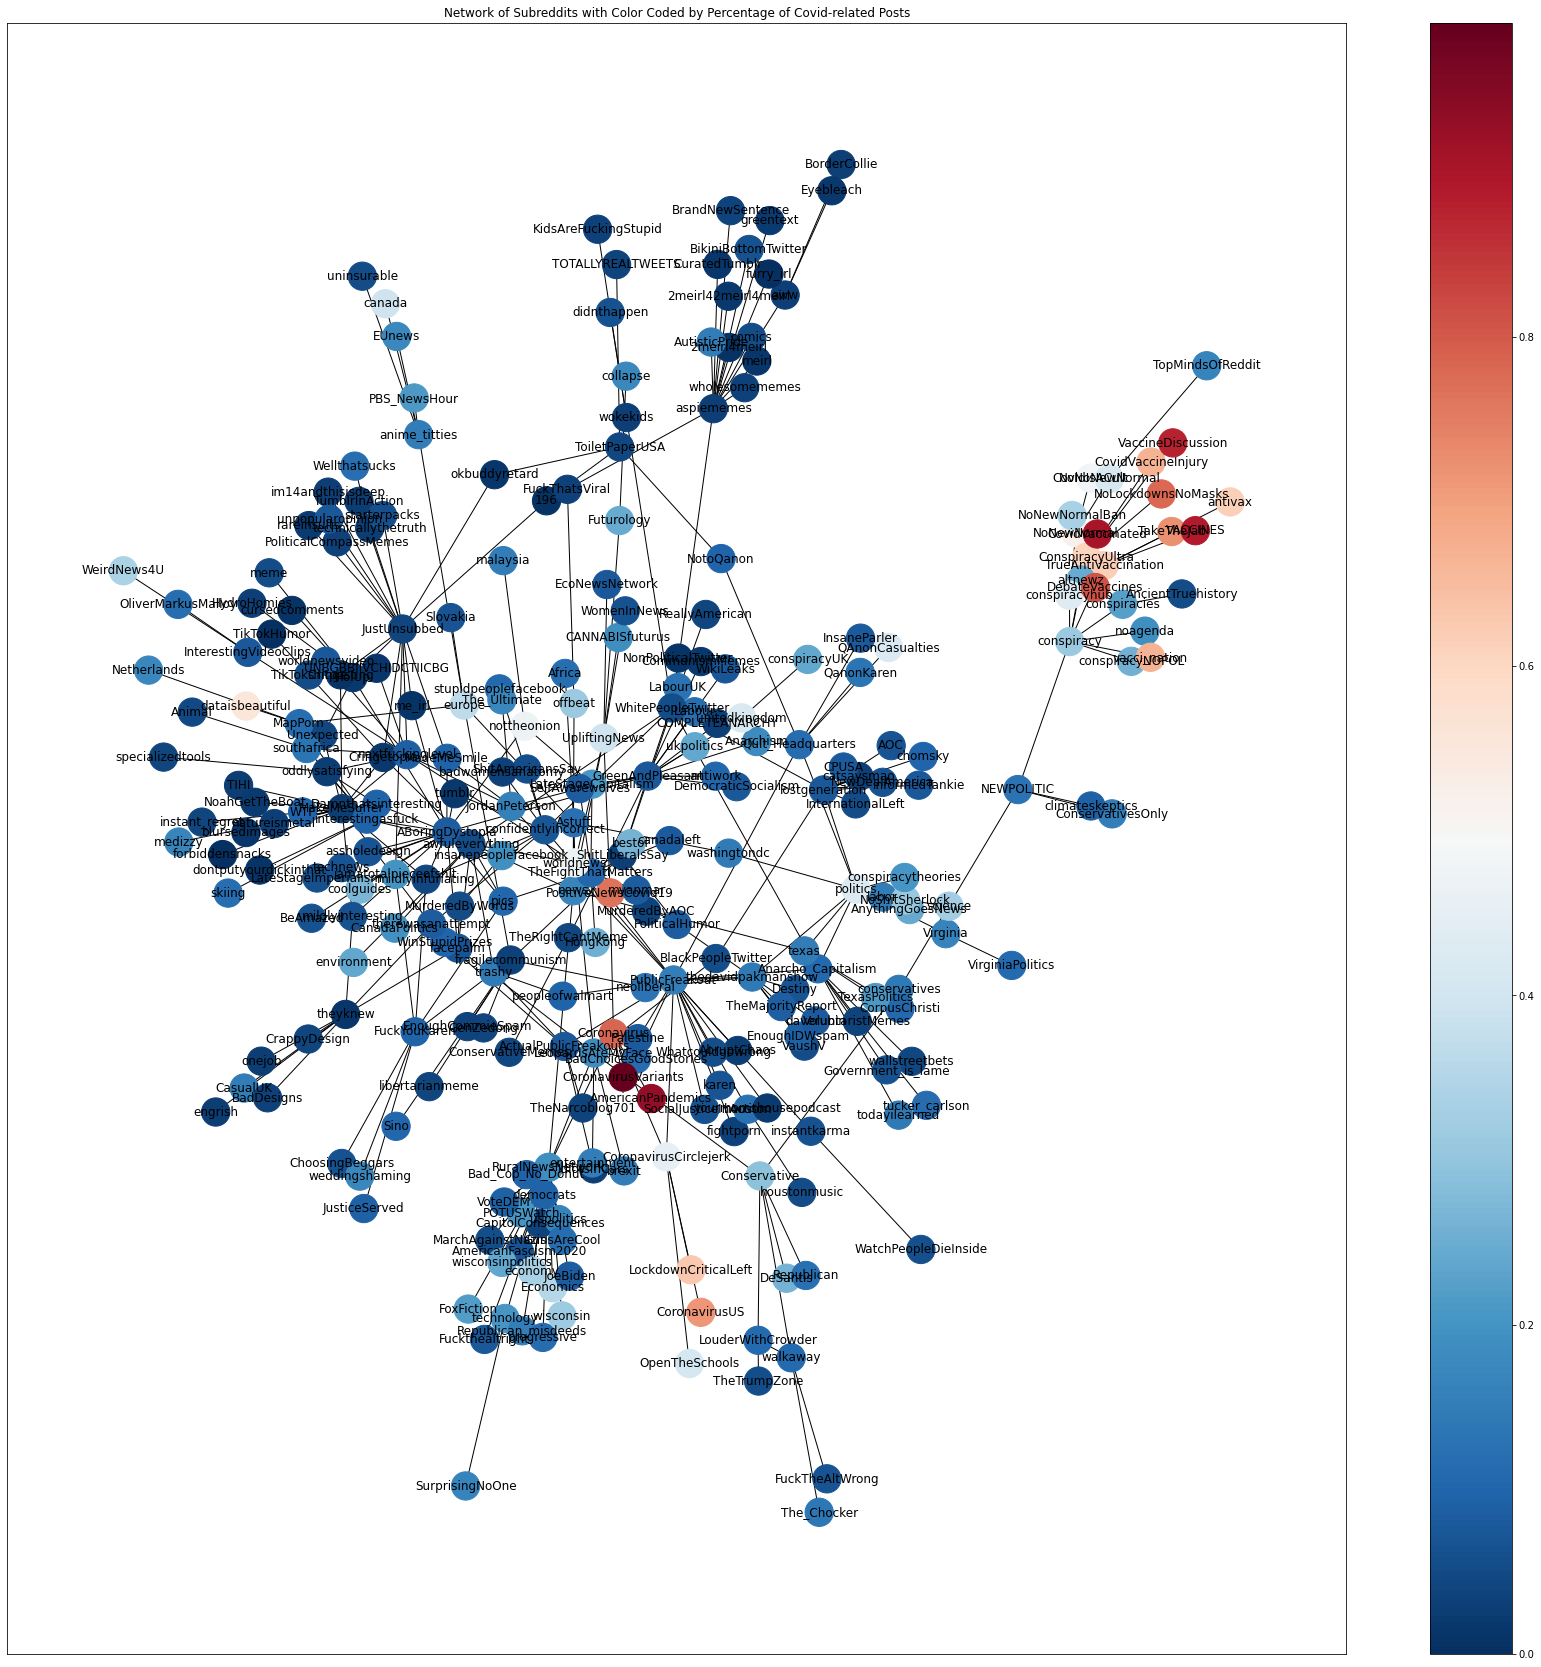

In [43]:
plt.figure(figsize=(30, 30))
ATTRIBUTE_NAME = 'cov_rel'
COLOR_SCHEME = "RdBu_r" # try plt.cm.Blues if your attribute is a continuous variable
Gcc = G4.subgraph(sorted(nx.connected_components(G4), key=len, reverse=True)[0])
colors = [Gcc.nodes[node][ATTRIBUTE_NAME] for node in list(Gcc.nodes())]
pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, node_size=10, node_color=colors, cmap=COLOR_SCHEME, label=Gcc.nodes())
# nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
nx.draw_networkx(Gcc, pos, node_color=colors, node_size=800, cmap=COLOR_SCHEME)
ax=plt.gca()
PCM=ax.get_children()[0] # this index may vary
plt.colorbar(PCM, ax=ax)
plt.title("Network of Subreddits with Color Coded by Percentage of Covid-related Posts")

In [44]:
stylized_network, config = nw.visualize(Gcc)

In [45]:
nw.visualize(Gcc, config=config)

(None, None)

In [47]:
posts[['posts', 'Covid', 'Non-Covid']].sum()

posts        26232841
Covid         3049424
Non-Covid    23183417
dtype: int64

## Classifier II

In [79]:
posts2 = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/done/EDA_stats.csv')

In [82]:
posts2.head()

subreddit  posts  posts_anti  posts_neutral  posts_pro  authors
0           altnewz    891         277            463        151       72
1      CovidIsACult     55           5             46          4        4
2       didnthappen     13           4              8          1        3
3    OpenTheSchools     16           1             14          1        6
4  punnychalkboards      6           1              5          0        3

In [81]:
posts2.rename(columns={'Unnamed: 0':'subreddit'}, inplace=True)

In [83]:
posts2['p_an_ratio'] = posts2['posts_anti'] / posts2['posts']

In [84]:
posts2['p_pr_ratio'] = posts2['posts_pro'] / posts2['posts']
posts2['p_ne_ratio'] = posts2['posts_neutral'] / posts2['posts']

<AxesSubplot:ylabel='Frequency'>

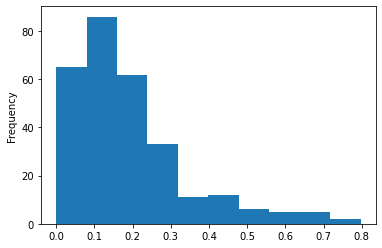

In [86]:
posts2['p_an_ratio'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

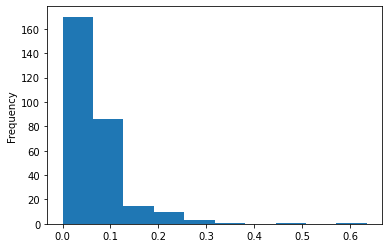

In [87]:
posts2['p_pr_ratio'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

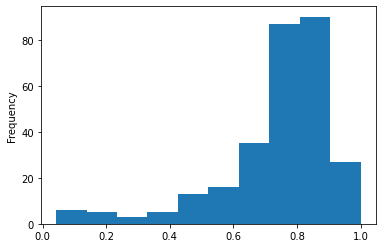

In [88]:
posts2['p_ne_ratio'].plot(kind='hist')

In [90]:
p_an_dict = pd.Series(posts2['p_an_ratio'].values, index=posts2.subreddit).to_dict()
p_pr_dict = pd.Series(posts2['p_pr_ratio'].values, index=posts2.subreddit).to_dict()
p_ne_dict = pd.Series(posts2['p_ne_ratio'].values, index=posts2.subreddit).to_dict()

In [91]:
G5 = G4.copy()
nx.set_node_attributes(G5, p_an_dict, 'anti_vac')
nx.set_node_attributes(G5, p_pr_dict, 'pro_vac')
nx.set_node_attributes(G5, p_ne_dict, 'neutral_vac')

In [100]:
G5.

NodeView(('dankmemes', 'FuckYouKaren', 'aspiememes', 'sciencememes', 'meme', 'HolUp', 'ABoringDystopia', 'MakeMeSuffer', 'theyknew', 'trippinthroughtime', 'BeAmazed', 'Damnthatsinteresting', 'GreenAndPleasant', 'LateStageImperialism', 'MadeMeSmile', 'assholedesign', 'coolguides', 'facepalm', 'interestingasfuck', 'me_irl', 'mildlyinfuriating', 'mildlyinteresting', 'news', 'nottheonion', 'pics', 'technews', 'tumblr', '196', 'JustUnsubbed', 'ToiletPaperUSA', '2meirl4meirl', 'AOC', 'lostgeneration', 'TIHI', 'dontputyourdickinthat', 'thanksihateit', 'AmericanFascism2020', 'RuralNewsNetwork', 'Anarchism', 'CoronavirusCirclejerk', 'AutisticPride', 'BadChoicesGoodStories', 'ActualPublicFreakouts', 'PublicFreakout', 'Bad_Cop_No_Donut', 'BikiniBottomTwitter', 'BlackPeopleTwitter', 'LeopardsAteMyFace', 'COMPLETEANARCHY', 'CapitolConsequences', 'CasualUK', 'ChoosingBeggars', 'Conservative', 'DeSantis', 'LouderWithCrowder', 'Republican', 'conservatives', 'walkaway', 'Coronavirus', 'AmericanPandemic

Text(0.5, 1.0, 'Network of Subreddits with Color Coded by Percentage of Covid-related Posts')

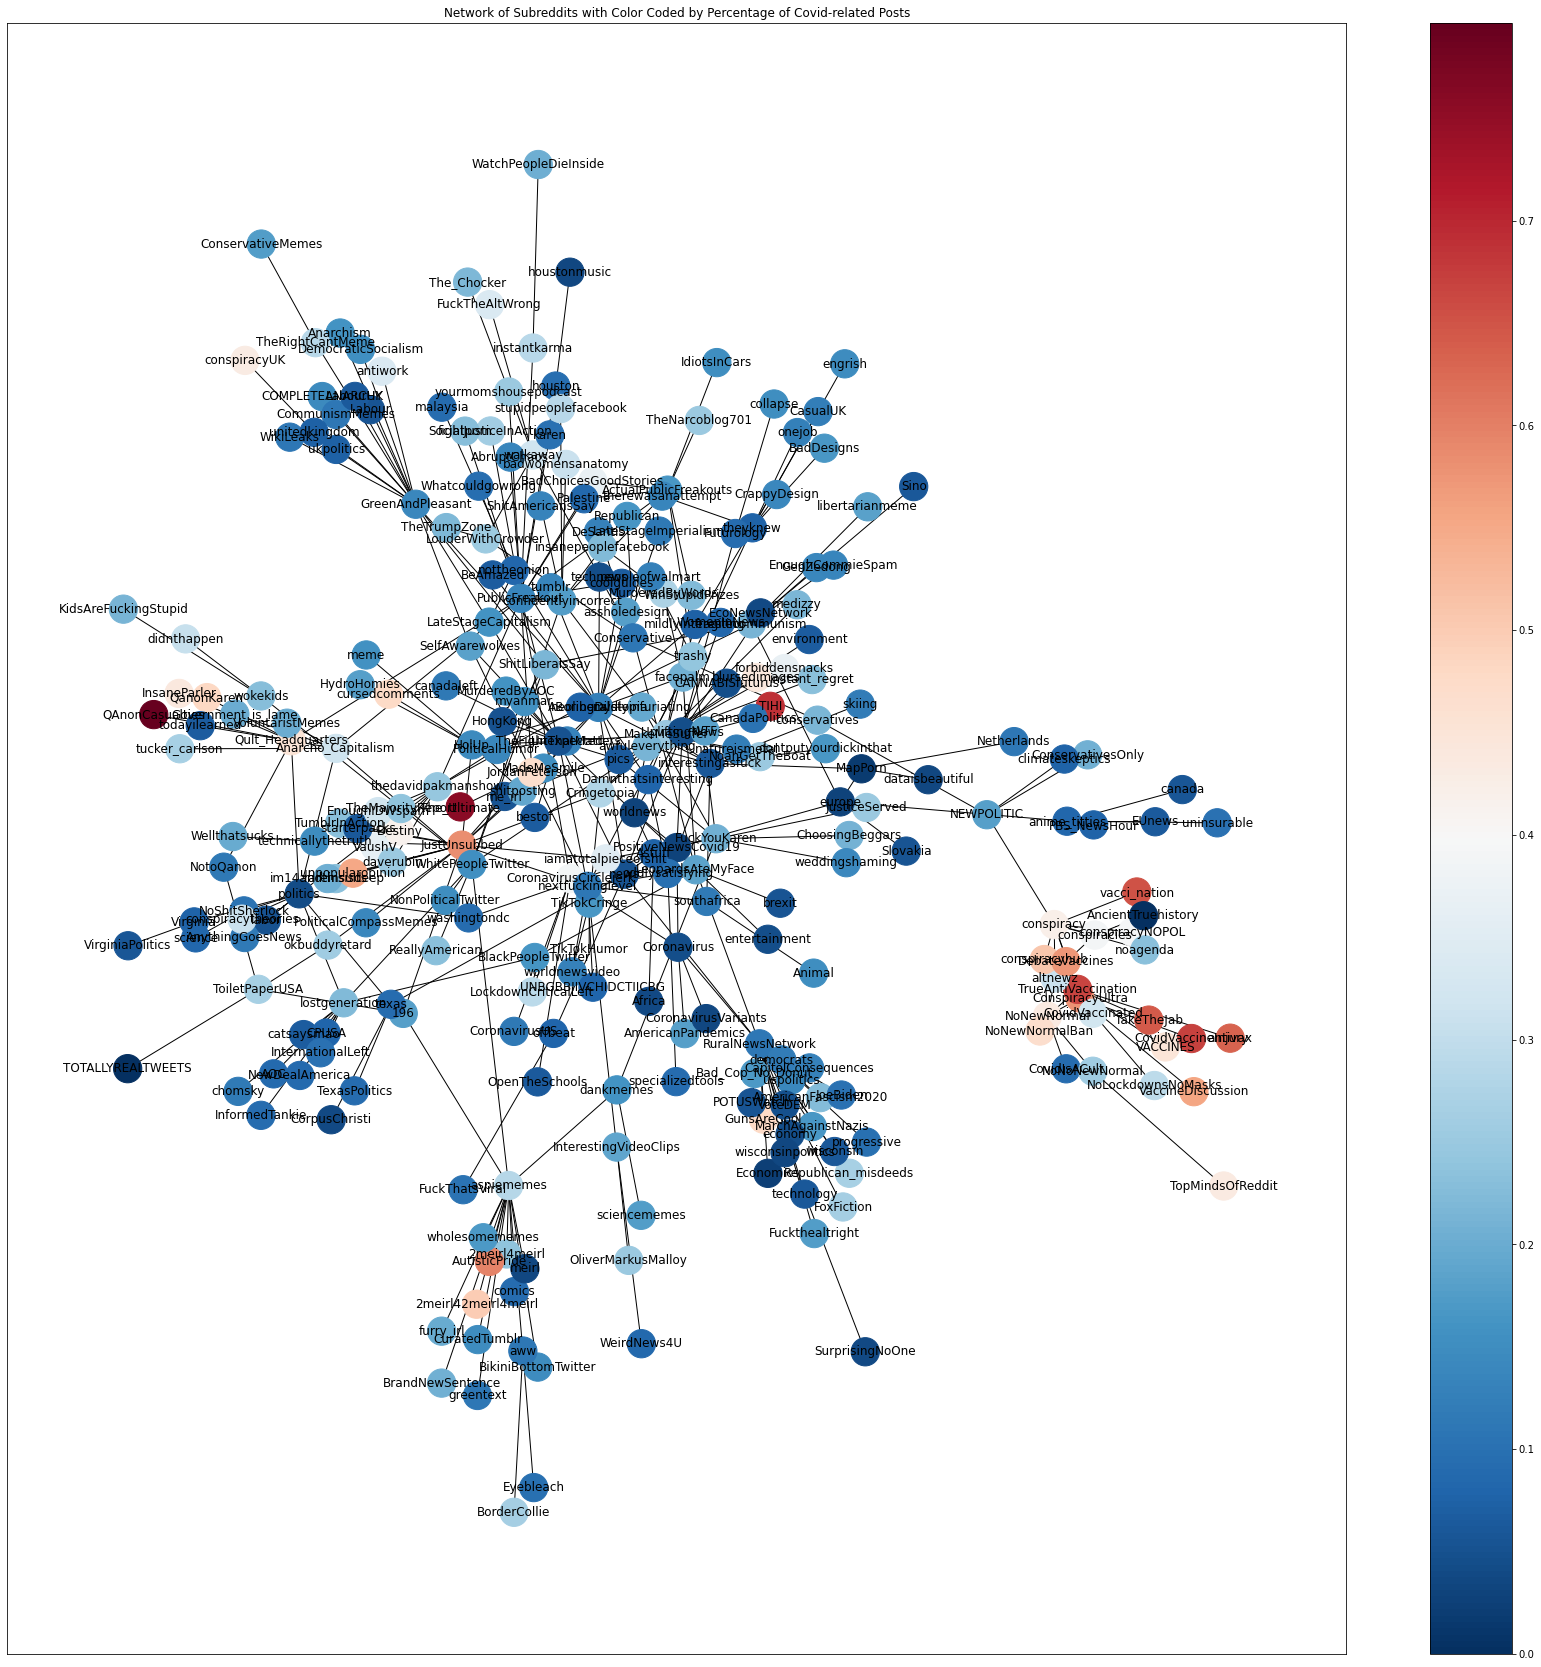

In [103]:
plt.figure(figsize=(30, 30))
ATTRIBUTE_NAME = 'anti_vac'
COLOR_SCHEME = "RdBu_r" # try plt.cm.Blues if your attribute is a continuous variable
Gcc5 = G5.subgraph(sorted(nx.connected_components(G5), key=len, reverse=True)[0])
colors = [Gcc5.nodes[node][ATTRIBUTE_NAME] for node in list(Gcc.nodes())]
pos = nx.spring_layout(Gcc5, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, node_size=10, node_color=colors, cmap=COLOR_SCHEME, label=Gcc.nodes())
# nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
nx.draw_networkx(Gcc5, pos, node_color=colors, node_size=800, cmap=COLOR_SCHEME)
ax=plt.gca()
PCM=ax.get_children()[0] # this index may vary
plt.colorbar(PCM, ax=ax)
plt.title("Network of Subreddits with Color Coded by Percentage of Covid-related Posts")

# LEGACY

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(320, 180)) 

nx.draw(G4, pos=nx.spring_layout(G4), node_color='r', edge_color='b', node_size=3, with_labels=True,)

In [11]:
posts['p_pr_ratio'] = posts['posts_pro'] / posts['posts']

In [14]:
posts['p_an_ratio'] = posts['posts_anti'] / posts['posts']
posts['p_ne_ratio'] = posts['posts_neutral'] / posts['posts']

In [15]:
posts.head()

Unnamed: 0  posts  posts_anti  posts_neutral  posts_pro  authors  \
0           altnewz   3651         428           3024        199      169   
1      CovidIsACult    115          15             93          7        6   
2       didnthappen    204          47            148          9       49   
3    OpenTheSchools     39           6             32          1       12   
4  punnychalkboards    258          23            220         15       31   

   p_pr_ratio  p_an_ratio  p_ne_ratio  
0    0.054506    0.117228    0.828266  
1    0.060870    0.130435    0.808696  
2    0.044118    0.230392    0.725490  
3    0.025641    0.153846    0.820513  
4    0.058140    0.089147    0.852713

(array([141., 103.,  16.,   7.,   7.,   6.,   2.,   2.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.02914187, 0.05828375, 0.08742562, 0.11656749,
        0.14570937, 0.17485124, 0.20399311, 0.23313499, 0.26227686,
        0.29141873, 0.32056061, 0.34970248, 0.37884435, 0.40798623,
        0.4371281 , 0.46626997, 0.49541185, 0.52455372, 0.5536956 ,
        0.58283747]),
 <BarContainer object of 20 artists>)

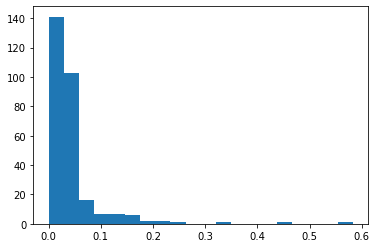

In [16]:
plt.hist(posts['p_pr_ratio'], bins = 20)

(array([25., 52., 40., 45., 47., 24., 12., 15.,  3.,  3.,  2.,  3.,  4.,
         3.,  6.,  0.,  2.,  1.,  0.,  1.]),
 array([0.00322358, 0.03888888, 0.07455417, 0.11021946, 0.14588475,
        0.18155004, 0.21721533, 0.25288063, 0.28854592, 0.32421121,
        0.3598765 , 0.39554179, 0.43120708, 0.46687238, 0.50253767,
        0.53820296, 0.57386825, 0.60953354, 0.64519883, 0.68086413,
        0.71652942]),
 <BarContainer object of 20 artists>)

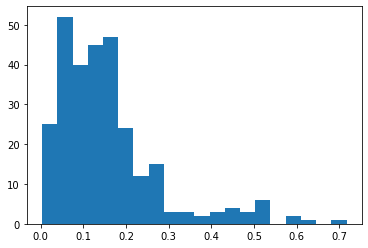

In [17]:
plt.hist(posts['p_an_ratio'], bins = 20)

(array([ 2.,  1.,  0.,  1.,  2.,  4.,  3.,  1.,  0.,  6.,  3.,  6.,  4.,
        17., 22., 47., 50., 53., 47., 19.]),
 array([0.09195015, 0.13683053, 0.18171092, 0.2265913 , 0.27147168,
        0.31635206, 0.36123244, 0.40611283, 0.45099321, 0.49587359,
        0.54075397, 0.58563435, 0.63051473, 0.67539512, 0.7202755 ,
        0.76515588, 0.81003626, 0.85491664, 0.89979703, 0.94467741,
        0.98955779]),
 <BarContainer object of 20 artists>)

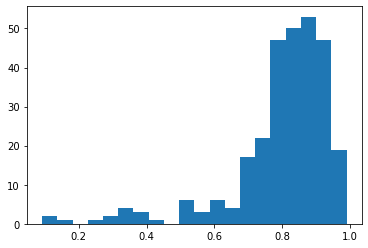

In [18]:
plt.hist(posts['p_ne_ratio'], bins = 20)

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(320, 180)) 

nx.draw(G4, pos=nx.spring_layout(G4), node_color='r', edge_color='b', node_size=3, with_labels=True,)

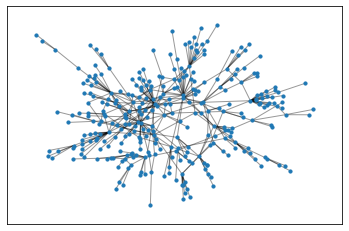

In [19]:
Gcc = G4.subgraph(sorted(nx.connected_components(G4), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, node_size=10)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

In [24]:
anti_dict = pd.Series(posts['p_an_ratio'].values, index=posts.subreddit).to_dict()

In [25]:
pro_dict = pd.Series(posts['p_pr_ratio'].values, index=posts.subreddit).to_dict()

In [26]:
neutr_dict = pd.Series(posts['p_ne_ratio'].values, index=posts.subreddit).to_dict()

In [27]:
nx.set_node_attributes(G4, anti_dict, 'anti_vac')

In [28]:
nx.set_node_attributes(G4, pro_dict, 'pro_vac')

In [29]:
nx.set_node_attributes(G4, neutr_dict, 'neutr_vac')

In [30]:
len(Gcc.nodes())

313

In [31]:
nodelist = list(G4.nodes())

In [32]:
for node in nodelist:
    if node not in anti_dict:
        G4.remove_node(node)

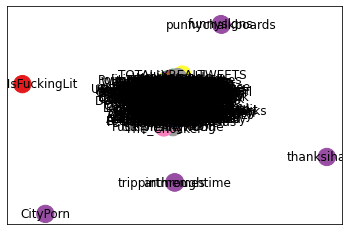

In [22]:
ATTRIBUTE_NAME = 'anti_vac'
COLOR_SCHEME = "Set1" # try plt.cm.Blues if your attribute is a continuous variable
colors = [G4.nodes[node][ATTRIBUTE_NAME] for node in list(G4.nodes())]
nx.draw_networkx(G4, node_color=colors, cmap=COLOR_SCHEME)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [33]:
G4.is_directed()

False

Text(0.5, 1.0, 'Network of Subreddits with Color Coded by Percentage of Pro Vaccine Posts')

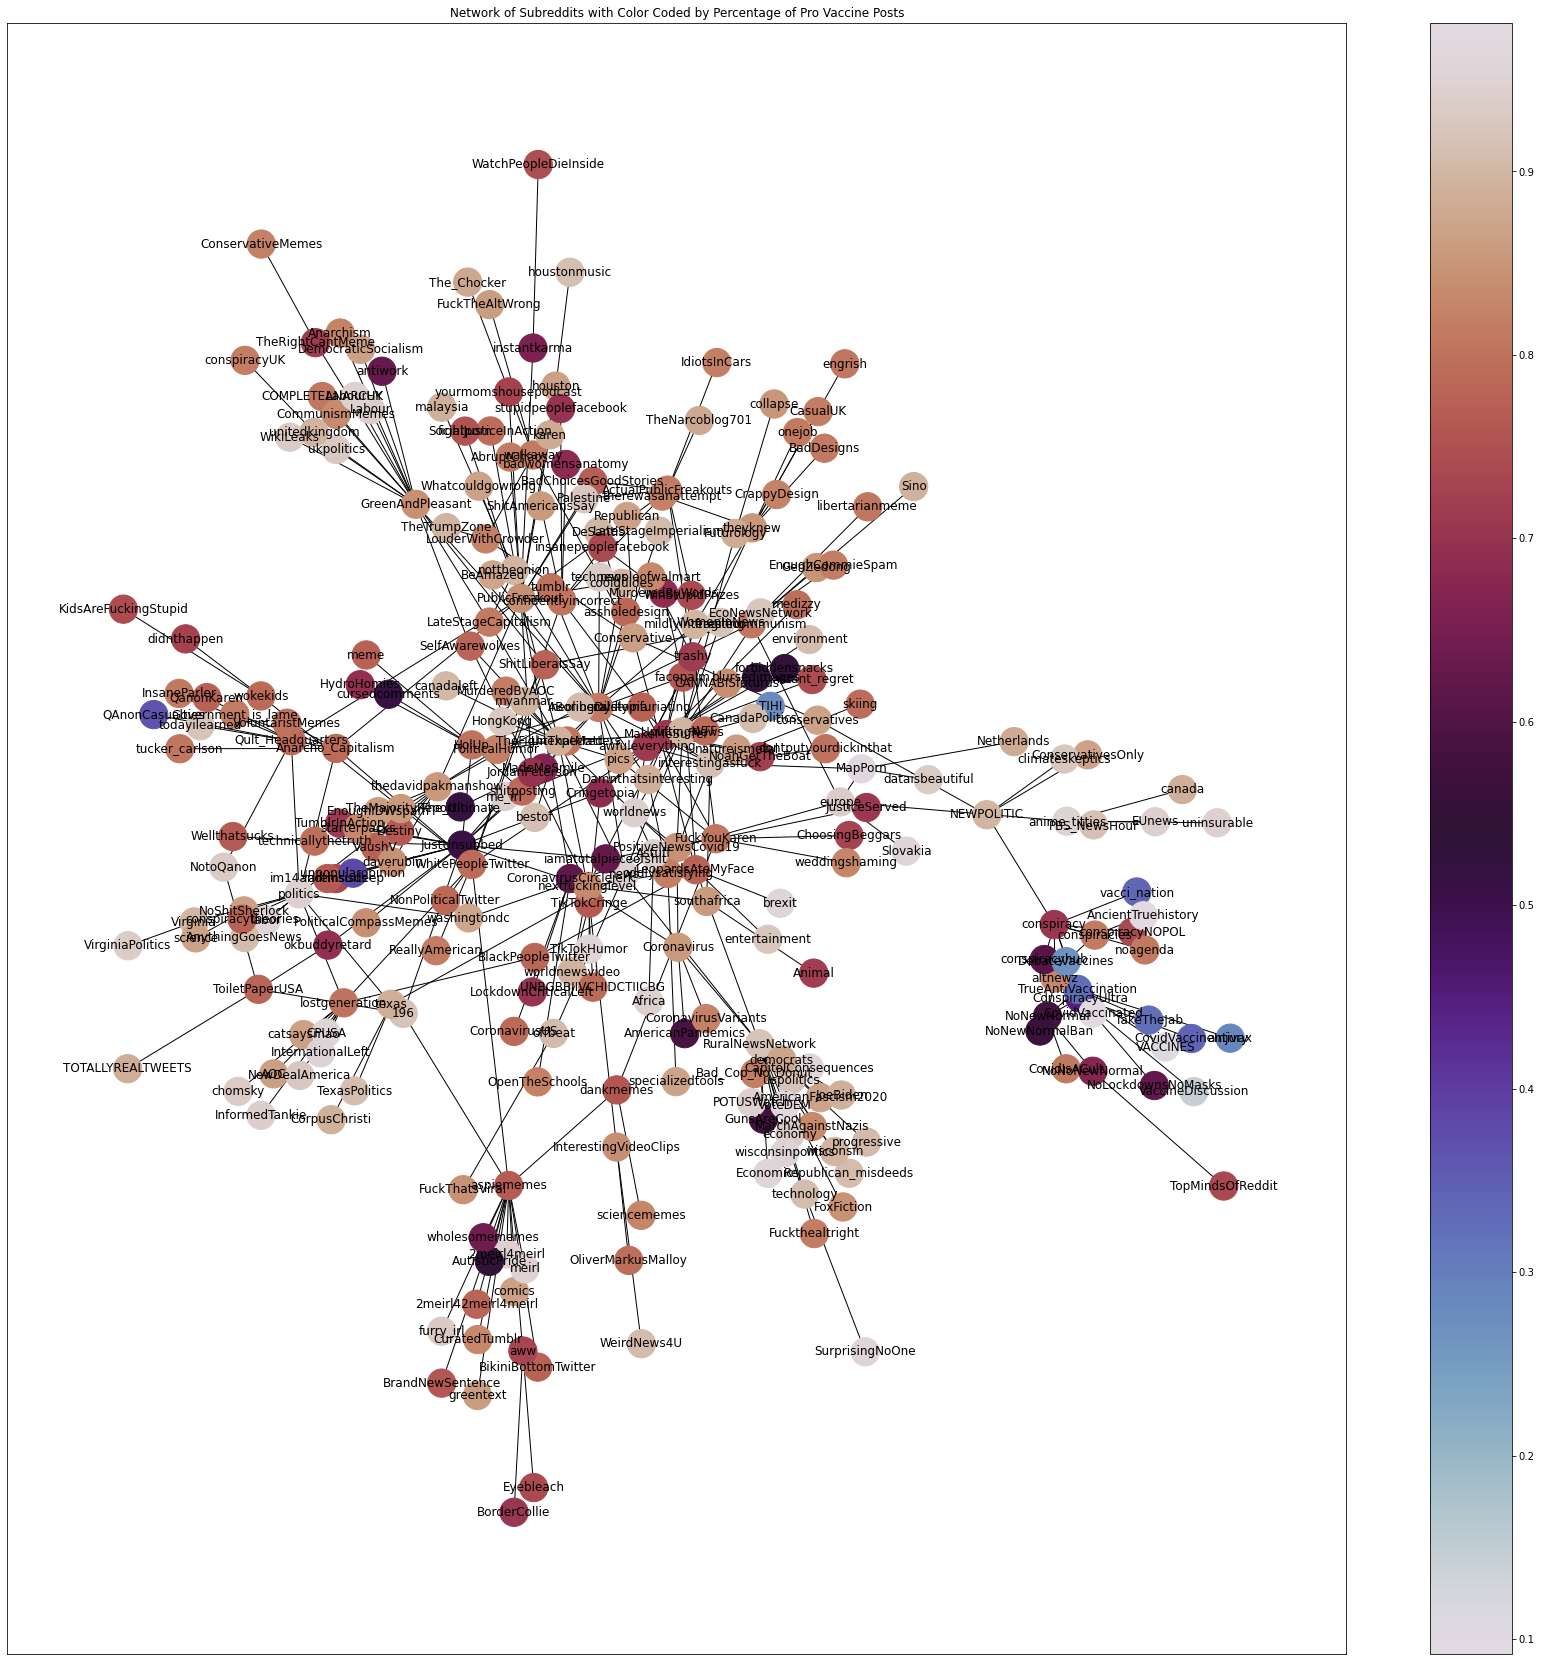

In [38]:
plt.figure(figsize=(30, 30))
ATTRIBUTE_NAME = 'neutr_vac'
COLOR_SCHEME = "twilight" # try plt.cm.Blues if your attribute is a continuous variable
Gcc = G4.subgraph(sorted(nx.connected_components(G4), key=len, reverse=True)[0])
colors = [Gcc.nodes[node][ATTRIBUTE_NAME] for node in list(Gcc.nodes())]
pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, node_size=10, node_color=colors, cmap=COLOR_SCHEME, label=Gcc.nodes())
# nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
nx.draw_networkx(Gcc, pos, node_color=colors, node_size=800, cmap=COLOR_SCHEME)
ax=plt.gca()
PCM=ax.get_children()[0] # this index may vary
plt.colorbar(PCM, ax=ax)
plt.title("Network of Subreddits with Color Coded by Percentage of Pro Vaccine Posts")

In [39]:
nw.visualize(Gcc)

({'xlim': [0, 754],
  'ylim': [0, 754],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 0.7674035989717224,
  'links': [{'source': 'dankmemes',
    'target': 'FuckYouKaren',
    'width': 0.26164788465439415,
    'weight': 22},
   {'source': 'dankmemes',
    'target': 'aspiememes',
    'width': 0.40992345401763364,
    'weight': 54},
   {'source': 'dankmemes',
    'target': 'sciencememes',
    'width': 0.2789175822062348,
    'weight': 25},
   {'source': 'FuckYouKaren',
    'target': 'ChoosingBeggars',
    'width': 0.2366694165242219,
    'weight': 18},
   {'source': 'FuckYouKaren',
    'target': 'JusticeServed',
    'width': 0.21604863016983714,
    'weight': 15},
   {'source': 'FuckYouKaren',
    'target': 'iamatotalpieceofshit',
    'width': 0.3105894748749174,
    'weight': 31},
   {'source': 'FuckYouKaren',
    'target': 'mildlyinfuriating',
    'width': 0.24947146957321073,
    'weight': 20},
   {'source': 'FuckYouKaren',
    'tar